In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
# Informa a URL de importação do dataset
# Estimation of Obesity Levels Based On Eating Habits and Physical Condition
url = "https://raw.githubusercontent.com/lucassamel/AutoInsight-Dataset/refs/heads/main/ObesityDataSet_raw_and_data_sinthetic.csv"

# Lê o arquivo 
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


| Nome da Variável                | Papel   | Tipo        | Demográfico | Descrição                                                                 |
|--------------------------------|---------|-------------|-------------|---------------------------------------------------------------------------|
| Gender                         | Feature | Categórica  | Gênero      |                                                                           |
| Age                            | Feature | Contínua    | Idade       |                                                                           |
| Height                         | Feature | Contínua    |             |                                                                           |
| Weight                         | Feature | Contínua    |             |                                                                           |
| family_history_with_overweight| Feature | Binária     |             | Algum membro da família sofre ou sofreu de sobrepeso?                     |
| FAVC                           | Feature | Binária     |             | Você consome alimentos altamente calóricos com frequência?               |
| FCVC                           | Feature | Inteira     |             | Você costuma comer vegetais nas refeições?                               |
| NCP                            | Feature | Contínua    |             | Quantas refeições principais você faz por dia?                           |
| CAEC                           | Feature | Categórica  |             | Você come entre as refeições?                                            |
| SMOKE                          | Feature | Binária     |             | Você fuma?                                                               |
| CH2O                           | Feature | Contínua    |             | Quantos copos de água você bebe por dia?                                 |
| SCC                            | Feature | Binária     |             | Você monitora as calorias que consome diariamente?                       |
| FAF                            | Feature | Contínua    |             | Com que frequência você pratica atividade física?                        |
| TUE                            | Feature | Inteira     |             | Quanto tempo você usa dispositivos tecnológicos (celular, TV, etc.)?     |
| CALC                           | Feature | Categórica  |             | Com que frequência você consome bebidas alcoólicas?                      |
| MTRANS                         | Feature | Categórica  |             | Qual meio de transporte você costuma usar?                               |
| NObeyesdad                     | Target  | Categórica  |             | Nível de obesidade                                                        |


In [3]:
# Tratando o Dataset


# Ordinal Encoding
caec_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
calc_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
obeyesdad_map = {'Normal_Weight': 0, 'Insufficient_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3,
                 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}

dataset['CAEC'] = dataset['CAEC'].map(caec_map)
dataset['CALC'] = dataset['CALC'].map(calc_map)
dataset['NObeyesdad'] = dataset['NObeyesdad'].map(obeyesdad_map)

# One-Hot Encoding
dataset = pd.get_dummies(dataset, columns=['MTRANS'], drop_first=True)

# Label Encoding
label_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC','MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking', 'NObeyesdad']
for col in label_cols:
    dataset[col] = LabelEncoder().fit_transform(dataset[col])
    
    
col = dataset.columns[15]  # Pega o nome da coluna na posição 15

# Reorganiza as colunas: remove ela da lista e adiciona no final
new_order = [c for c in dataset.columns if c != col] + [col]

# Reaplica a ordem ao DataFrame
dataset = dataset[new_order]

# Mostra as primeiras linhas do dataset
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,1,0,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,1,0,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,1,0,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,1,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,1,0,6


In [4]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:19]
y = array[:,19]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

LR: 0.722763 (0.026688)
KNN: 0.866117 (0.028232)
CART: 0.924155 (0.021538)
NB: 0.530808 (0.016804)
SVM: 0.541512 (0.041327)
Bagging: 0.947270 (0.012284)
RF: 0.944893 (0.016372)
ET: 0.938370 (0.019589)
Ada: 0.454505 (0.071207)
GB: 0.963860 (0.007719)
Voting: 0.851891 (0.016350)


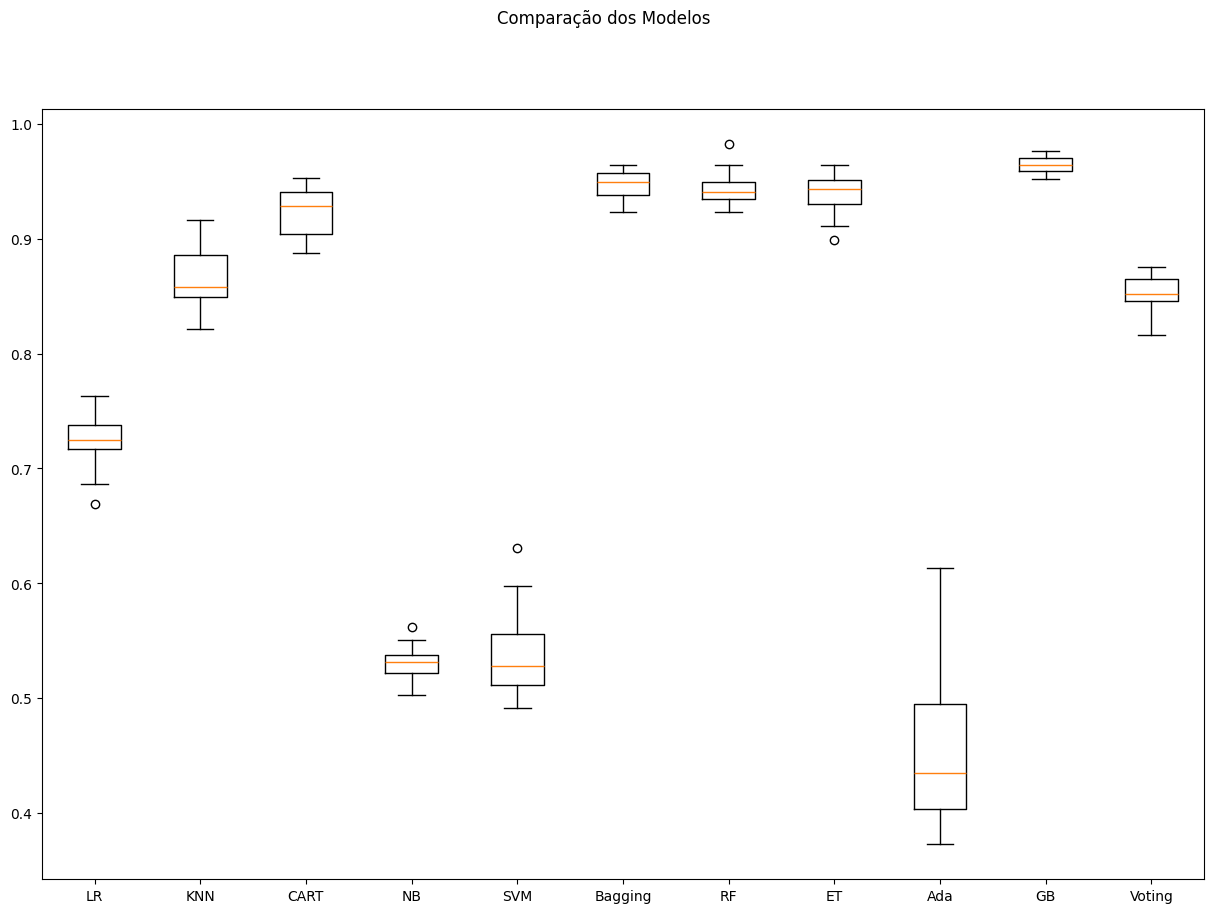

In [5]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200))) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos (treinamento)
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10)) 
fig.suptitle('Comparação dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

LR-orig: 0.723 (0.027)
KNN-orig: 0.866 (0.028)
CART-orig: 0.924 (0.022)
NB-orig: 0.531 (0.017)
SVM-orig: 0.542 (0.041)
Bag-orig: 0.947 (0.012)
RF-orig: 0.945 (0.016)
ET-orig: 0.938 (0.020)
Ada-orig: 0.455 (0.071)
GB-orig: 0.964 (0.008)
Vot-orig: 0.852 (0.016)
LR-padr: 0.879 (0.014)
KNN-padr: 0.803 (0.023)
CART-padr: 0.925 (0.017)
NB-padr: 0.478 (0.018)
SVM-padr: 0.867 (0.019)
Bag-padr: 0.950 (0.013)
RF-padr: 0.951 (0.014)
ET-padr: 0.935 (0.018)
Ada-padr: 0.455 (0.071)
GB-padr: 0.964 (0.008)
Vot-padr: 0.916 (0.013)
LR-norm: 0.720 (0.033)
KNN-norm: 0.764 (0.030)
CART-norm: 0.920 (0.019)
NB-norm: 0.504 (0.016)
SVM-norm: 0.794 (0.025)
Bag-norm: 0.948 (0.011)
RF-norm: 0.948 (0.016)
ET-norm: 0.941 (0.022)
Ada-norm: 0.455 (0.071)
GB-norm: 0.965 (0.007)
Vot-norm: 0.825 (0.033)


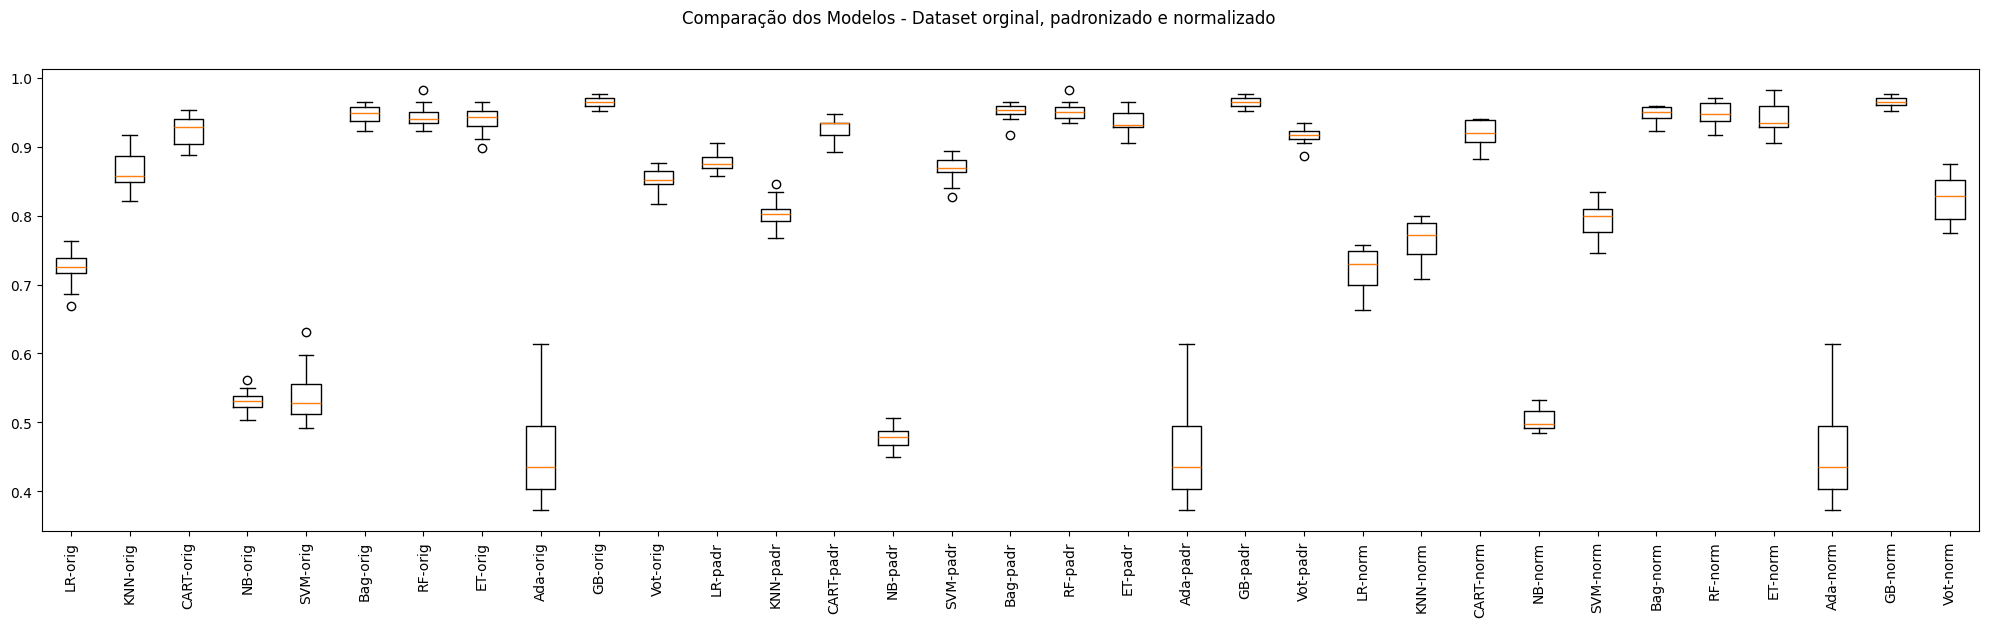

In [6]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines
# A ordem de execução é da esquerda para a direita.

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log]))) 
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log]))) 
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging]))) 
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log]))) 
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging]))) 
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names, rotation=90)
plt.show()

In [8]:
np.random.seed(7)  # Definindo uma semente global para este bloco

# Lista de modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200))) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(estimators=bases, voting='hard')))

# Definindo os componentes do pipeline
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Lista de pipelines
pipelines = []

# Criando pipelines para cada modelo
for name, model in models:
    pipelines.append((name + '-orig', Pipeline(steps=[(name, model)])))
    pipelines.append((name + '-padr', Pipeline(steps=[standard_scaler, (name, model)])))
    pipelines.append((name + '-norm', Pipeline(steps=[min_max_scaler, (name, model)])))

# Definindo os parâmetros para GridSearchCV
param_grids = {
    'LR': {
        'LR__C': [0.01, 0.1, 1, 10, 100],
        'LR__solver': ['liblinear', 'saga']
    },
    'KNN': {
        'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
        'KNN__metric': ["euclidean", "manhattan", "minkowski"]
    },
    'CART': {
        'CART__max_depth': [None, 10, 20, 30, 40, 50],
        'CART__min_samples_split': [2, 5, 10],
        'CART__min_samples_leaf': [1, 2, 4]
    },
    'NB': {
        'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    'SVM': {
        'SVM__C': [0.1, 1, 10, 100],
        'SVM__gamma': [1, 0.1, 0.01, 0.001],
        'SVM__kernel': ['rbf', 'linear']
    },
    'RF': {
        'RF__n_estimators': [10, 50, 100, 200],
        'RF__max_features': ['auto', 'sqrt', 'log2'],
        'RF__max_depth': [None, 10, 20, 30],
        'RF__min_samples_split': [2, 5, 10],
        'RF__min_samples_leaf': [1, 2, 4]
    },
    'ET': {
        'ET__n_estimators': [10, 50, 100, 200],
        'ET__max_features': ['auto', 'sqrt', 'log2'],
        'ET__max_depth': [None, 10, 20, 30],
        'ET__min_samples_split': [2, 5, 10],
        'ET__min_samples_leaf': [1, 2, 4]
    },
    'Ada': {
        'Ada__n_estimators': [10, 50, 100, 200],
        'Ada__learning_rate': [0.01, 0.1, 1, 10]
    },
    'GB': {
        'GB__n_estimators': [10, 50, 100, 200],
        'GB__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'GB__max_depth': [3, 5, 7, 9]
    },
    'Voting': {
        # Para VotingClassifier, geralmente não há hiperparâmetros para ajustar diretamente
        # Ajustar os hiperparâmetros dos estimadores base individualmente se necessário
    }
}

# Parâmetros de cross-validation e scoring
scoring = 'accuracy'
kfold = 5

# Executando o GridSearchCV para cada pipeline
for name, pipeline in pipelines:
    model_type = name.split('-')[0]
    if model_type in param_grids:
        param_grid = param_grids[model_type]
    else:
        param_grid = {}  # Para modelos que não têm parâmetros definidos

    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # Imprimindo a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))
    
#It took 80min

Modelo: LR-orig - Melhor: 0.770139 usando {'LR__C': 100, 'LR__solver': 'liblinear'}
Modelo: LR-padr - Melhor: 0.865536 usando {'LR__C': 100, 'LR__solver': 'saga'}
Modelo: LR-norm - Melhor: 0.890994 usando {'LR__C': 100, 'LR__solver': 'saga'}
Modelo: KNN-orig - Melhor: 0.925932 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Modelo: KNN-padr - Melhor: 0.859005 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Modelo: KNN-norm - Melhor: 0.842424 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Modelo: CART-orig - Melhor: 0.925967 usando {'CART__max_depth': 40, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Modelo: CART-padr - Melhor: 0.927145 usando {'CART__max_depth': 40, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Modelo: CART-norm - Melhor: 0.927740 usando {'CART__max_depth': 50, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Modelo: NB-orig - Melhor: 0.631507 usando {'NB__var_smoothing': 1e-05}
Modelo: NB-padr - Mel

In [7]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:    
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_)) 

Sem tratamento de missings: knn-orig - Melhor: 0.925359 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}
Sem tratamento de missings: knn-padr - Melhor: 0.876761 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-norm - Melhor: 0.859559 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}


In [8]:
# Avaliação do modelo com o conjunto de testes
# Melhor modelo
# Modelo: GB-orig - Melhor: 0.967426 usando {'GB__learning_rate': 0.1, 'GB__max_depth': 5, 'GB__n_estimators': 200}

np.random.seed(7)

# Preparação do modelo
scaler = MinMaxScaler().fit(X_train)
rescaledX = scaler.transform(X_train) # aplicação da normalização no conjunto de treino
model = GradientBoostingClassifier(n_estimators=50, 
                               max_features='sqrt',
                               min_samples_split=2,
                               max_depth=5,
                               min_samples_leaf=1)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da normalização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.933806146572104


In [14]:
np.random.seed(7)

model = GradientBoostingClassifier(n_estimators=num_trees)

pipeline = Pipeline([min_max_scaler, gradient_boosting])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9621749408983451


In [10]:
# Salvando o modelo
model_filename = 'rf_obesity_classifier.pkl'
with open("../models/"+model_filename, 'wb') as file:
    pickle.dump(model, file)

# Salvando o scaler
scaler_filename = 'minmax_scaler_obesity.pkl'
with open("../scalers/"+scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)
    
# Salvando o pipeline
pipeline_filename = 'rf_obesity_pipeline.pkl'
with open("../pipelines/"+pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)
    
# Salvando X_test e y_test
X_test_df = pd.DataFrame(X_test, columns=dataset.columns[:-1])
y_test_df = pd.DataFrame(y_test, columns=[dataset.columns[-1]])
X_test_df.to_csv("../data/X_test_dataset_obesitys.csv", index=False)
y_test_df.to_csv("../data/y_test_dataset_obesity.csv", index=False)

In [11]:
# Preparação do modelo com TODO o dataset
scaler = MinMaxScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da normalização com TODO o dataset
model.fit(rescaledX, y)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [12]:
# Novos dados - não sabemos a classe!
data = {'Gender':  [0, 1, 0],   # 0: Feminino, 1: Masculino
        'Age': [55, 27, 28],    # Idade em anos
        'Height': [1.60, 1.77, 1.50], # Altura em metros
        'Weight': [65, 70, 55],   # Peso em kg
        'family_history_with_overweight': [1, 0, 0], # Fator de risco familiar 
        'FAVC': [1, 0, 1],  # 1: Sim, 0: Não
        'FCVC': [3, 1, 2],  # Frequência de consumo de vegetais (1: Baixa, 2: Média, 3: Alta)
        'NCP': [3, 3, 3],   # Número de porções de frutas e vegetais consumidas diariamente
        'CAEC': [1, 1, 0],  # Consumo de alimentos entre as refeições (0: Não, 1: As vezes, 2: Frequentemente, 3: Sempre)
        'SMOKE': [0, 0, 0], # Fumante (1: Sim, 0: Não)
        'CH2O': [5, 10, 6],  # Copos de agua consumidos diariamente
        'SCC': [0, 0, 0],  # Monitora as calorias consumidas (1: Sim, 0: Não)
        'FAF': [1, 3, 2],  # Frequencia de Atividade Física (0: Não, 1: As vezes, 2: Frequentemente, 3: Sempre)
        'TUE': [12, 12, 5], # Quantidade de horas de uso de tela por dia
        'CALC': [1, 1, 1], # Frequencia de consume de alcool 
        'MTRANS_Bike': [0, 1, 0],  # Transporte de bicicleta (1: Sim, 0: Não)
        'MTRANS_Motorbike': [0, 0, 0],  # Transporte de moto (1: Sim, 0: Não)
        'MTRANS_Public_Transportation': [1, 0, 0],  # Transporte público (1: Sim, 0: Não)
        'MTRANS_Walking': [0, 0, 1], # Transporte a pé (1: Sim, 0: Não)        
        }

atributos = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 
             'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:19].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[0.         0.87234043 0.28301887 0.19402985 1.         1.
  1.         0.66666667 0.33333333 0.         2.         0.
  0.33333333 6.         0.33333333 0.         0.         1.
  0.        ]
 [1.         0.27659574 0.60377358 0.23134328 0.         0.
  0.         0.66666667 0.33333333 0.         4.5        0.
  1.         6.         0.33333333 1.         0.         0.
  0.        ]
 [0.         0.29787234 0.09433962 0.11940299 0.         1.
  0.5        0.66666667 0.         0.         2.5        0.
  0.66666667 2.5        0.33333333 0.         0.         0.
  1.        ]]


In [13]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[5. 0. 5.]
